In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d


In [2]:
MAP_n = pd.read_csv("results_Agoston/results_MAP_n_connections.csv", index_col = 0)
MAP_n2 = pd.read_csv("results_Agoston/results_MAP_n2_connections.csv", index_col = 0)
MAP_n3 = pd.read_csv("results_Agoston/results_MAP_n3_connections.csv", index_col = 0)

MPE_n = pd.read_csv("results_Agoston/results_MPE_n_connections.csv", index_col = 0)
MPE_n2 = pd.read_csv("results_Agoston/results_MPE_n2_connections.csv", index_col = 0)
MPE_n3 = pd.read_csv("results_Agoston/results_MPE_n3_connections.csv", index_col = 0)

In [3]:
MAP = pd.concat([MAP_n, MAP_n2, MAP_n3])
MPE = pd.concat([MPE_n, MPE_n2, MAP_n3])

In [4]:
MAP_per_node = MAP.groupby(['Heuristic', 'Number Nodes']).mean()
MPE_per_node = MPE.groupby(['Heuristic', 'Number Nodes']).mean()


In [5]:
num_nodes = MAP[MAP['Heuristic'] == 'minfill'].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
seconds = MAP[MAP['Heuristic'] == 'minfill'].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']

Text(0, 0.5, 'Time [s]')

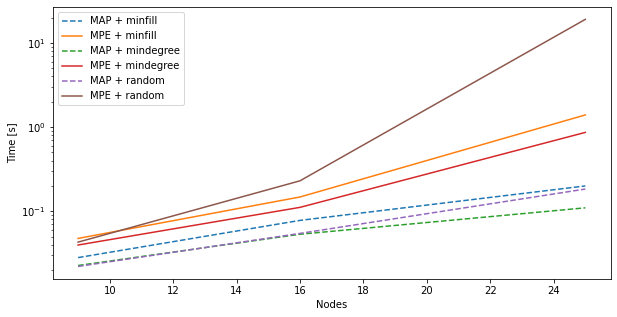

In [6]:
fig,ax = plt.subplots(facecolor = 'white')
ax.set_facecolor('white') 
heuristics = ['minfill', 'mindegree', 'random']
for heur in heuristics:
    num_nodes = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']

    ax.plot(num_nodes, seconds , '--',label= 'MAP + ' + heur)
    
    num_nodes = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']
    
    ax.plot(num_nodes, seconds, label= 'MPE + ' + heur)
    
ax.set_yscale('log')
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Time [s]')

Text(0, 0.5, 'Lines summed or multiplied out')

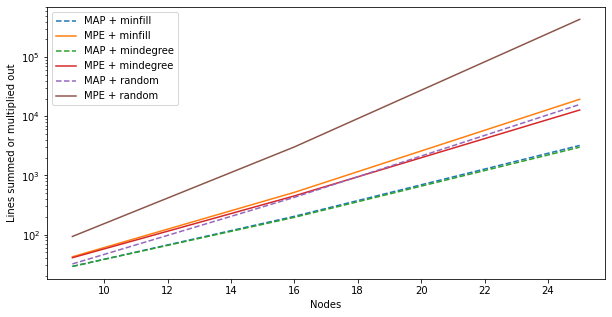

In [7]:
fig,ax = plt.subplots(facecolor = 'white')
ax.set_facecolor('white') 
heuristics = ['minfill', 'mindegree', 'random']
for heur in heuristics:
    num_nodes = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']

    ax.plot(num_nodes, (summed+maxed) , '--',label= 'MAP + ' + heur)
    
    num_nodes = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']
    
    ax.plot(num_nodes, (summed+maxed), label= 'MPE + ' + heur)
    
ax.set_yscale('log')
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Lines summed or multiplied
           out')

Text(0, 0.5, 'Lines multiplied')

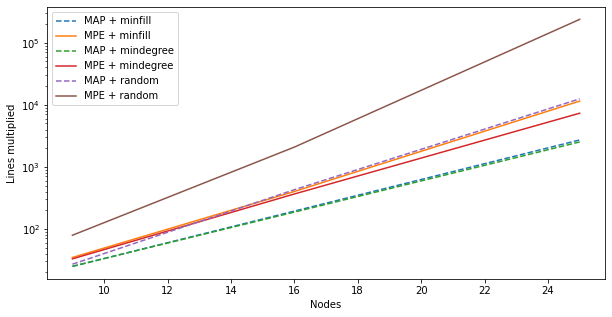

In [8]:
fig,ax = plt.subplots(facecolor = 'white')
ax.set_facecolor('white') 
heuristics = ['minfill', 'mindegree', 'random']
for heur in heuristics:
    num_nodes = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']

    ax.plot(num_nodes, multiplications , '--',label= 'MAP + ' + heur)
    
    num_nodes = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']
    
    ax.plot(num_nodes, multiplications, label= 'MPE + ' + heur)
    
ax.set_yscale('log')
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Lines multiplied')

Text(0, 0.5, 'Ratio between summed or maxed out and multiplications')

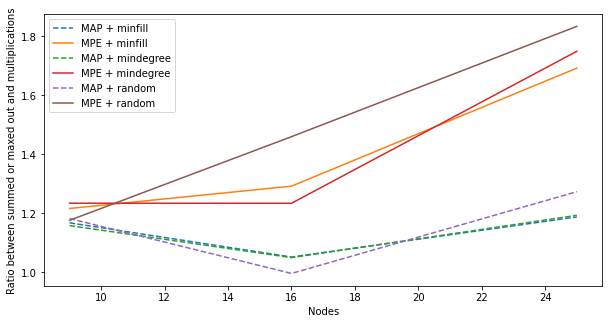

In [9]:
fig,ax = plt.subplots(facecolor = 'white')
ax.set_facecolor('white') 
heuristics = ['minfill', 'mindegree', 'random']
for heur in heuristics:
    num_nodes = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MAP[MAP['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']

    ax.plot(num_nodes, (summed+maxed)/multiplications , '--',label= 'MAP + ' + heur)
    
    num_nodes = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['Number Nodes']
    seconds = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['seconds elapsed']
    multiplications = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows multiplied']
    summed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows summed out']
    maxed = MPE[MPE['Heuristic'] == heur].groupby('Number Nodes', as_index = False).mean()['rows maxed out']
    
    ax.plot(num_nodes, (summed+maxed)/multiplications, label= 'MPE + ' + heur)
    
#ax.set_yscale('log')
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Ratio between summed or maxed out and multiplications')

Text(0, 0.5, 'Rows multiplied')

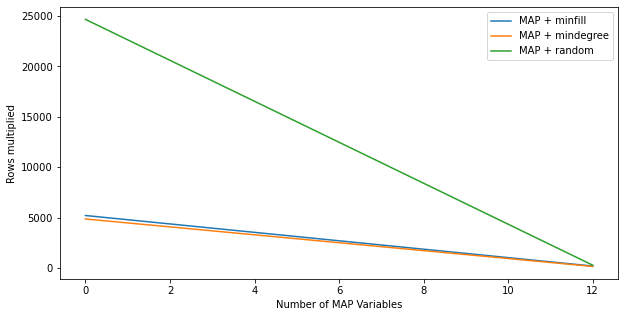

In [11]:
fig,ax = plt.subplots(facecolor = 'white')
ax.set_facecolor('white') 
for heur in heuristics:
    num_evidence = MAP[(MAP['Heuristic'] == heur) & (MAP['Number Nodes'] == 25)].groupby('Number Evidence', as_index = False).mean()['Number Evidence']
    multiplications = MAP[(MAP['Heuristic'] == heur) & (MAP['Number Nodes'] == 25)].groupby('Number Evidence', as_index = False).mean()['rows multiplied']
    
    ax.plot(num_evidence, multiplications, label= 'MAP + ' + heur)
    
    num_evidence = MPE[(MPE['Heuristic'] == heur) & (MPE['Number Nodes'] == 25)].groupby('Number Evidence', as_index = False).mean()['Number Evidence']
    multiplications = MPE[(MPE['Heuristic'] == heur) & (MPE['Number Nodes'] == 25)].groupby('Number Evidence', as_index = False).mean()['rows multiplied']
    
    #ax.plot(num_edges, seconds, label= 'MPE + ' + heur)
    
#ax.set_yscale('log')
plt.legend()
plt.xlabel('Number of MAP Variables')
plt.ylabel('Rows multiplied')

In [211]:
np.expand_dims(np.array(seconds), 0).shape

(1, 59)

In [213]:
np.average((np.expand_dims(np.array(seconds), 0)).reshape(-1, 5), axis=0)

ValueError: cannot reshape array of size 59 into shape (5)

In [151]:
MAP[(MAP['Heuristic'] == heur) & (MAP['Number Nodes'] == 25)].groupby('Number Edges', as_index = False).mean()

,Number Edges,Number Nodes,Number Evidence,Number MAP variables:,rows multiplied,rows summed out,rows maxed out,seconds elapsed
0,20,25.0,6.000000,7.000000,70.333333,65.400000,21.575000,0.066008
1,26,25.0,9.000000,7.000000,30.000000,31.500000,10.000000,0.059448
2,27,25.0,6.000000,11.000000,765.000000,654.000000,182.333333,0.122639
3,28,25.0,4.000000,3.000000,223.000000,68.333333,206.333333,0.054109
4,29,25.0,7.500000,6.500000,467.333333,414.250000,62.833333,0.080359
5,30,25.0,5.714286,5.571429,1221.952381,1097.523810,185.523810,0.086132
6,31,25.0,4.941176,7.352941,1140.470588,930.470588,304.352941,0.093941
7,32,25.0,6.000000,9.142857,2071.785714,1849.642857,279.071429,0.121570
8,33,25.0,3.000000,10.000000,10151.500000,9465.000000,1696.250000,0.238098
9,34,25.0,7.500000,4.000000,272.250000,199.750000,88.750000,0.076998


In [106]:
MPE

,Memory Error,Number Edges,Number Nodes,Number Evidence,Number MAP variables:,Heuristic,Instantiation,rows multiplied,rows summed out,rows maxed out,seconds elapsed,Number MAP variables:
0,No,15,9,0,0.0,minfill,p l2n1 l2n2 l2n0 l0n1 l0n0 ...,139,0,166,0.120643,NaN
0,No,11,9,0,0.0,minfill,p l2n0 l2n1 l0n0 l0n1 l0n2 l1...,100,0,114,0.083901,NaN
0,No,16,9,0,0.0,minfill,p l2n0 l2n1 l2n2 l0n2 l0n0 ...,122,0,158,0.088505,NaN
0,No,12,9,0,0.0,minfill,p l2n0 l2n2 l0n0 l0n1 l0n2 ...,172,0,192,0.089320,NaN
0,No,13,9,0,0.0,minfill,p l2n1 l2n0 l0n2 l0n1 l0n0 ...,156,0,202,0.089222,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
0,No,30,25,12,NaN,random,l0n0 l2n2 l4n1 l0n1 l2n0 l2n1 l1n2 ...,224,0,278,0.549352,0.0
0,No,27,25,12,NaN,random,l0n4 l3n2 l0n3 l2n4 l1n0 l4n4 l0n0 l0...,632,0,818,0.242431,0.0
0,No,33,25,12,NaN,random,l0n1 l4n3 l0n4 l2n1 l3n4 l4n0 l3n1 ...,864,0,829,0.237986,0.0
0,No,29,25,12,NaN,random,l0n2 l4n0 l4n4 l2n0 l1n4 l0n0 l4n3 l...,66,0,90,0.157499,0.0
